In [1]:
from os.path import join as ospj

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Insira aqui o caminho para os dados processados!
BASEPATH = '../YoutubeData/processed/'

# Funções auxiliares

In [2]:
def head(df, n=5):
    """ Função auxiliar para exibir as 'n' primeiras linhas dos dados e o seu formato """
    print('Formato dos dados:', df.shape)
    display(df.head(n))
    
def load_data(country):
    """ Função auxiliar para carregar os dados de um país, convertendo as datas no formato datetime """
    filepath = ospj(BASEPATH, f'{country}data.csv')
    return pd.read_csv(filepath, parse_dates=['trending_date', 'publish_time'])

In [3]:
us_data = load_data('US')
head(us_data)

Formato dos dados: (40379, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


# 1) Visualizações gerais por categoria

## 1.1) Contagem de vídeos que entraram em trending mais de uma vez

In [4]:
trend_count = us_data.groupby(['title', 'category_name']).size()
trend_count = trend_count.reset_index(name='trend_count')
head(trend_count)

Formato dos dados: (6372, 3)


,title,category_name,trend_count
0,#184 Making a PCB using EasyEDA. // Review,Science & Technology,1
1,"#23 Feed The Homeless | One List, One Life",People & Blogs,6
2,#57: AM and SSB explained,Science & Technology,4
3,"#AboveTheNoise feat. Serena Williams, Neymar J...",Music,1
4,#DisneyParksLIVE: Fantasy In The Sky New Years...,Entertainment,4


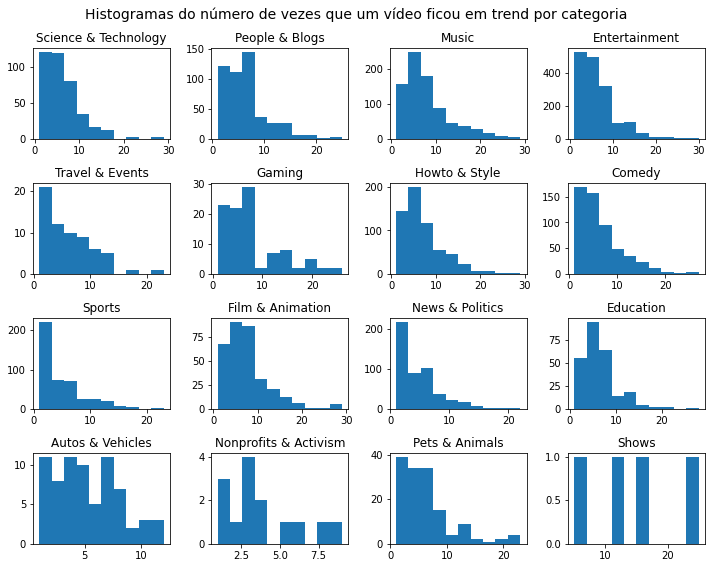

In [5]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,8))

categories = trend_count['category_name'].unique().reshape((4,4))
for i in range(4):
    for j in range(4):
        category = categories[i][j]
        axs[i,j].set_title(f'{category}')
        axs[i,j].hist(trend_count[trend_count['category_name'] == category]['trend_count'])

fig.suptitle('Histogramas do número de vezes que um vídeo ficou em trend por categoria', fontsize=14)
fig.tight_layout()
fig.show()

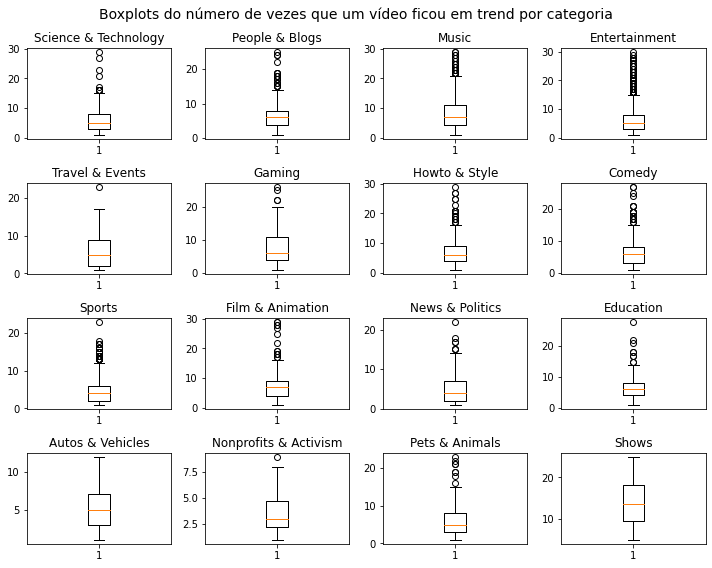

In [6]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,8))

categories = trend_count['category_name'].unique().reshape((4,4))
for i in range(4):
    for j in range(4):
        category = categories[i][j]
        axs[i,j].set_title(f'{category}')
        axs[i,j].boxplot(trend_count[trend_count['category_name'] == category]['trend_count'])

fig.suptitle('Boxplots do número de vezes que um vídeo ficou em trend por categoria', fontsize=14)
fig.tight_layout()
fig.show()

## 1.2) Ranking do número de trends em cada categoria

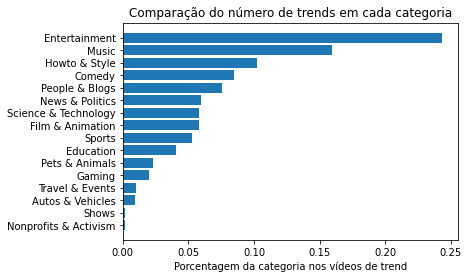

In [7]:
trend_count = us_data.groupby('category_name').size()
trend_count = (trend_count / sum(trend_count)).sort_values()

plt.title('Comparação do número de trends em cada categoria')
plt.xlabel('Porcentagem da categoria nos vídeos de trend')
plt.barh(y=trend_count.index, width=trend_count.values)
plt.show()

# 2) Visualizações de "métricas" para cada categoria

- Por métricas, queremos dizer número de likes, dislikes, views e comentários.

## 2.1) Ranking do número de likes em cada categoria

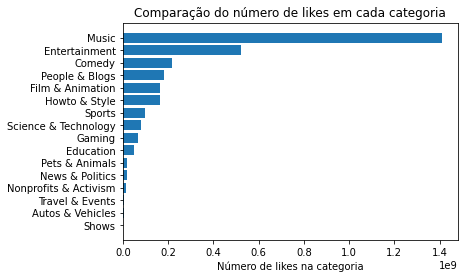

In [8]:
num_likes = us_data.groupby('category_name')['likes'].sum()
num_likes = num_likes.sort_values()

plt.title('Comparação do número de likes em cada categoria')
plt.xlabel('Número de likes na categoria')
plt.barh(y=num_likes.index, width=num_likes.values)
plt.show()

## 2.2) Ranking do número de dislikes em cada categoria

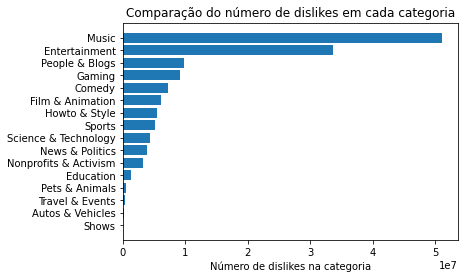

In [9]:
num_dislikes = us_data.groupby('category_name')['dislikes'].sum()
num_dislikes = num_dislikes.sort_values()

plt.title('Comparação do número de dislikes em cada categoria')
plt.xlabel('Número de dislikes na categoria')
plt.barh(y=num_dislikes.index, width=num_dislikes.values)
plt.show()

## 2.3) Ranking do número de comentários em cada categoria

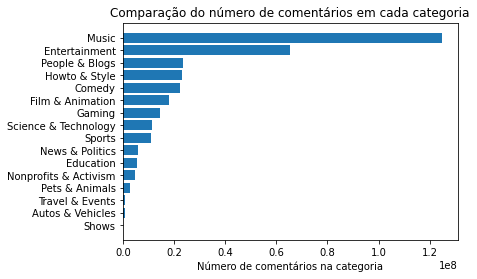

In [10]:
num_comments = us_data.groupby('category_name')['comment_count'].sum()
num_comments = num_comments.sort_values()

plt.title('Comparação do número de comentários em cada categoria')
plt.xlabel('Número de comentários na categoria')
plt.barh(y=num_comments.index, width=num_comments.values)
plt.show()

## 2.4) Ranking do número de views em cada categoria

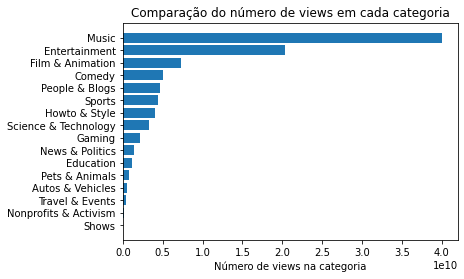

In [11]:
num_views = us_data.groupby('category_name')['views'].sum()
num_views = num_views.sort_values()

plt.title('Comparação do número de views em cada categoria')
plt.xlabel('Número de views na categoria')
plt.barh(y=num_views.index, width=num_views.values)
plt.show()

# 3) Correlação entre métricas para cada categoria

## 3.1) Correlação entre métricas no geral (bem meh)

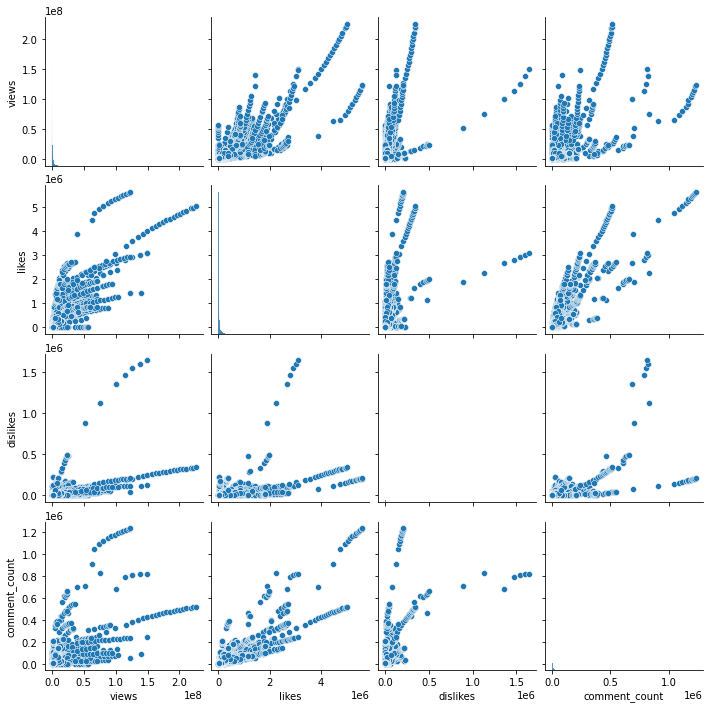

In [12]:
import seaborn as sns

sns.pairplot(us_data[['views', 'likes', 'dislikes', 'comment_count']])